## Common Ensemble Techniques:


- Bagging:
- Stacking:
- Boosting:


Boosting:
Sequentially trains models, giving more weight to misclassified instances in previous models (e.g., AdaBoost, Gradient
Boosting).


Stacking:
Trains multiple diverse models and then trains a meta-model on top of their predictions.


Bagging:
Trains multiple models on different random subsets of the data and averages their predictions (e.g., Random Forest).


## KNN


### Genarate Synthetic Data

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Create curved data
X = np.linspace(0, 10, 100).reshape(-1, 1) # 100 points between 0 and 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0]) # sine curve with noise

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
X

array([[ 0.        ],
       [ 0.1010101 ],
       [ 0.2020202 ],
       [ 0.3030303 ],
       [ 0.4040404 ],
       [ 0.50505051],
       [ 0.60606061],
       [ 0.70707071],
       [ 0.80808081],
       [ 0.90909091],
       [ 1.01010101],
       [ 1.11111111],
       [ 1.21212121],
       [ 1.31313131],
       [ 1.41414141],
       [ 1.51515152],
       [ 1.61616162],
       [ 1.71717172],
       [ 1.81818182],
       [ 1.91919192],
       [ 2.02020202],
       [ 2.12121212],
       [ 2.22222222],
       [ 2.32323232],
       [ 2.42424242],
       [ 2.52525253],
       [ 2.62626263],
       [ 2.72727273],
       [ 2.82828283],
       [ 2.92929293],
       [ 3.03030303],
       [ 3.13131313],
       [ 3.23232323],
       [ 3.33333333],
       [ 3.43434343],
       [ 3.53535354],
       [ 3.63636364],
       [ 3.73737374],
       [ 3.83838384],
       [ 3.93939394],
       [ 4.04040404],
       [ 4.14141414],
       [ 4.24242424],
       [ 4.34343434],
       [ 4.44444444],
       [ 4

In [20]:
y

array([-0.04764921,  0.17114369,  0.13701593,  0.35129337,  0.34598396,
        0.53941283,  0.49122955,  0.63892391,  0.66000042,  0.86662622,
        0.66437896,  0.91071582,  0.84900448,  0.89055365,  0.95212918,
        1.02993971,  1.03155376,  0.995066  ,  0.95152494,  0.91686686,
        0.7699169 ,  1.12613693,  0.93740205,  0.77618311,  0.75934327,
        0.5858309 ,  0.28124503,  0.67928461,  0.46873476,  0.18525797,
        0.08711351,  0.07056378,  0.17569158, -0.06592363, -0.27054164,
       -0.44529624, -0.49573865, -0.54490416, -0.54871619, -0.89846467,
       -0.94866003, -0.76078535, -0.90242078, -0.8325068 , -0.99839364,
       -0.98276046, -0.76506508, -0.93059617, -0.95675099, -1.10548387,
       -0.98209312, -0.98164769, -0.81090699, -0.81770464, -0.84583623,
       -0.80588504, -0.45756455, -0.52033005, -0.51816308, -0.39493554,
       -0.31627691, -0.18118531,  0.05955446, -0.1980416 ,  0.33024605,
        0.39813327,  0.43694315,  0.49730828,  0.4558416 ,  0.49

### Training KNN for Regression


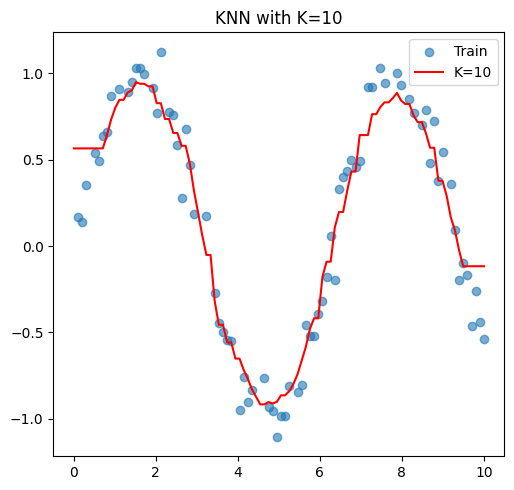

In [21]:
# Try different values of k
k_values = [1, 3, 10]

plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X)

plt.subplot(1, 3, i)
plt.scatter(X_train, y_train, label="Train", alpha=0.6)
plt.plot(X, y_pred, color='red', label=f'K={k}')
plt.title(f'KNN with K={k}')
plt.legend()

plt.tight_layout()
plt.show()


## Distance Metrics (How do we find the "nearest"?)

### A. Euclidean Distance

In [22]:
import numpy as np

point1 = np.array([3, 4])
point2 = np.array([0, 0])

distance = np.sqrt(np.sum((point1 - point2)**2)) 
# [9, 16] 
#  Add 25
#  5
print(distance) # Output: 5.0


5.0


## B. Manhatan Distance

## C. Minkowski

### KNN Classification on Iris Dataset

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load dataset
iris = load_iris()
X = iris.data # features: sepal/petal size
y = iris.target # class: 0=setosa, 1=versicolor, 2=virginica

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

### Evaluate the Classifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



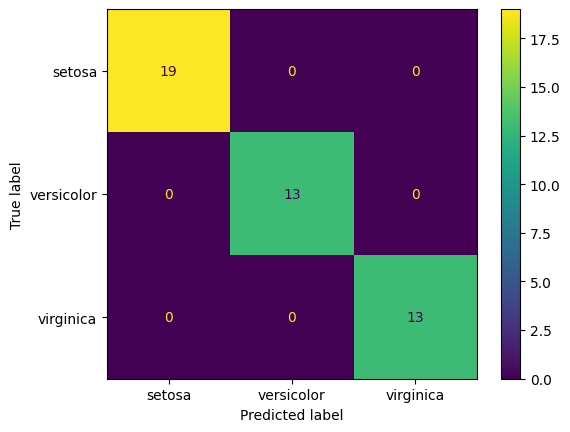

In [24]:
# Classification report (accuracy, precision, recall, F1)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names)

## Recommendation Systems


* **Content-Based Filtering**: Suggests items based on what *you* liked.
* **Collaborative Filtering**: Suggests items based on what *others like you* liked.

|Users| Movie A | Movie B | Movie C |
|--------| -------- | -------- | -------- |
|User 1 | 5  | 3  | ? |
|User 2  | 4  | ?  | 2 |
|User 3 | ? | 3  | 3 |

### What Is SVD?


SVD (Singular Value Decomposition)


$$
R \approx U \cdot \Sigma \cdot V^T
$$


In [25]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
import pandas as pd


In [26]:
# Sample data
ratings_dict = {
"user": ["Alice", "Alice", "Bob", "Bob", "Carol"],
"item": ["Movie1", "Movie3", "Movie1", "Movie2", "Movie2"],
"rating": [4, 5, 5, 3, 4]
}

df = pd.DataFrame(ratings_dict)

# Create Reader object
reader = Reader(rating_scale=(1, 5))

# Load data
data = Dataset.load_from_df(df[["user", "item", "rating"]], reader)


In [27]:
df

,user,item,rating
0,Alice,Movie1,4
1,Alice,Movie3,5
2,Bob,Movie1,5
3,Bob,Movie2,3
4,Carol,Movie2,4


In [28]:
# Use SVD algorithm
model = SVD()

# Evaluate model using 5-fold cross-validation
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3063  0.1432  0.3288  1.2761  1.0120  0.8133  0.4859  
MAE (testset)     1.3063  0.1432  0.3288  1.2761  1.0120  0.8133  0.4859  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([1.30628961, 0.14321265, 0.32880892, 1.27608835, 1.0120016 ]),
 'test_mae': array([1.30628961, 0.14321265, 0.32880892, 1.27608835, 1.0120016 ]),
 'fit_time': (0.0010001659393310547, 0.0, 0.0, 0.0, 0.0),
 'test_time': (0.0, 0.0, 0.0, 0.0009996891021728516, 0.0)}

### Making Predictions


In [29]:
# Train on full data
trainset = data.build_full_trainset()
model.fit(trainset)

# Predict rating for Carol on Movie3
prediction = model.predict("Carol", "Movie3")
print(prediction.est) # e.g., 4.12


4.2068469540547495


### Collaborative Filtering with Alternating Least Squares (ALS)

|Users| Book A | Book B | Book C |
|--------| -------- | -------- | -------- |
|User 1 | 5  | 2  | ? |
|User 2  | ?  | ?  | 4|
|User 3 | 1 | 2  | ? |

### How ALS Works
(The Math Behind ALS)


- The Matrix Factorization Formula

$$
R \approx U \cdot V^T
$$

### Implementation - ALS Using implicit Library


In [30]:
import implicit
import scipy.sparse as sparse

# Data 
user_ids = [0, 0, 1, 1, 2, 2]
item_ids = [0, 2, 1, 3, 0, 2]
ratings = [5, 2, 3, 4, 1, 2]

# Item-user matrix (items × users)
item_user_matrix = sparse.coo_matrix((ratings, (item_ids, user_ids))).tocsr()

# ALS model
model = implicit.als.AlternatingLeastSquares(factors=10, regularization=0.1, iterations=15)

# Confidence weighting
item_user_confidence = (item_user_matrix * 10).astype('double')

# Fit
model.fit(item_user_confidence)

# Recommend for a specific user
user_id = 0
user_vector = item_user_matrix.T.tocsr()[user_id]  # only that user's row
recommendations = model.recommend(user_id, user_vector, N=3)

print("Recommendations for user 0:", recommendations)


  0%|          | 0/15 [00:00<?, ?it/s]

Recommendations for user 0: (array([1, 2, 0]), array([ 1.4901161e-07, -3.4028235e+38, -3.4028235e+38], dtype=float32))


### Alternating Least Squares (ALS) with the MovieLens Dataset


In [ ]:
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("ALSExample").getOrCreate()

# Load the MovieLens 100k dataset
ratings = spark.read.csv('u.data', sep='\t', inferSchema=True)
ratings = ratings.withColumnRenamed("_c0", "userId") \
.withColumnRenamed("_c1", "movieId") \
.withColumnRenamed("_c2", "rating") \
.withColumnRenamed("_c3", "timestamp")


In [ ]:
ratings.show(5)

In [ ]:
ratings.printSchema()


### Train-Test Split


In [ ]:
(training, test) = ratings.randomSplit([0.8, 0.2])


In [ ]:
from pyspark.ml.recommendation import ALS

als = ALS(
userCol="userId",
itemCol="movieId",
ratingCol="rating",
rank=10, # number of latent factors
maxIter=10, # number of iterations
regParam=0.1, # regularization to avoid overfitting
coldStartStrategy="drop", # drop NaNs during evaluation
nonnegative=True
)
model = als.fit(training)


### Make Predictions


In [ ]:
predictions = model.transform(test)
predictions.show(5)


### Evaluate the Model


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
metricName="rmse",
labelCol="rating",
predictionCol="prediction"
)

rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")


| Feature | SVD | ALS |
|---|---|---|
| Handles missing values | No (requires imputation first) | Yes (works with sparse matrices) |
| Works with implicit data | Not designed for it | Yes |
| Scalable to big data | Limited (not scalable) | Yes (used in Spark) |
| Interpretability | Eigenvalues give insight | Latent features are interpretable |
| Training approach | All at once (matrix decomposition) | Alternating optimization (least squares) |
| Common usage | Academic research, Surprise library | Large-scale recommender systems |


<br/>

# NLP

### Core Concepts of NLP


#### Text Preprocessing: Cleaning and preparing raw text


Lowercasing: "Hello" → "hello"


Removing punctuation: "What's up?" → "Whats up"


Tokenization: Splitting text into words


Stopword Removal: Removing common words like "the", "is", "and"


Stemming / Lemmatization: Reducing words to their root form


#### Code Example:


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
import importlib
import text_preprocessor
importlib.reload(text_preprocessor)

<module 'text_preprocessor' from 'd:\\DS_Lessons\\lessons\\demos\\text_preprocessor.py'>

In [53]:
text = "Natural Language Processing is fun and useful!"

text = text.lower()

# Remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))

# Tokenize
tokens = word_tokenize(text)
# Remove stopwords
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word not in stop_words]


# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

print("Original tokens:", tokens)
print("Filtered tokens:", filtered_tokens)
print("Stemmed tokens:", stemmed_tokens)


Original tokens: ['natural', 'language', 'processing', 'is', 'fun', 'and', 'useful']
Filtered tokens: ['natural', 'language', 'processing', 'is', 'fun', 'and', 'useful']
Stemmed tokens: ['natur', 'languag', 'process', 'is', 'fun', 'and', 'use']


### Vectorization: Turning words into numbers


## BOW - Bag of Words

Bag of Words" (BoW) is just a way to turn text into a fixed-length vector. Whether an entry is 1 or 0 depends on how you choose to encode the BoW. The usual variants:

Binary BoW (presence/absence): For each word in the vocabulary, the vector entry is 1 if that word appears at least once in the document, otherwise 0. Example: vocab = [dog, cat, tree]; document "dog dog cat" → [1, 1, 0].

### How the model "decides" a 1 vs 0 in practice

1. **Build a vocabulary** from your corpus (list of tokens and their indices).  
2. **Preprocess text**:
   - Tokenize  
   - Lowercase  
   - Remove punctuation  
   - (Optional) Remove stopwords  
   - (Optional) Stem/Lemmatize  
   This affects which tokens are present.
3. **For each document and each vocabulary token**:
   - **Binary BoW**: `vector[index] = 1` if the token appears in the document at least once, else `0`.  
   - **Count BoW**: `vector[index] =` number of occurrences.  
   - **Weighted**: Compute a weight (TF, TF-IDF, etc.) and optionally apply a threshold to set small values to `0`.


### Quick sklearn example:

1. **Binary BoW**: CountVectorizer(binary=True)
2. **Counts**: CountVectorizer(binary=False)
3. **TF-IDF**: TfidfVectorizer()

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['natur', 'languag', 'process', 'is', 'fun', 'and', 'use']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(X.toarray())


['and' 'fun' 'is' 'languag' 'natur' 'process' 'use']
[[0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]]
